In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df.shape

(7565, 7)

In [ ]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [ ]:
df=df[df['size'].str.isnumeric()]

In [ ]:
df['size']=df['size'].astype(np.float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df=df[df['price'].str.isnumeric()]

In [ ]:
df['price']=df['price'].astype(np.float32)

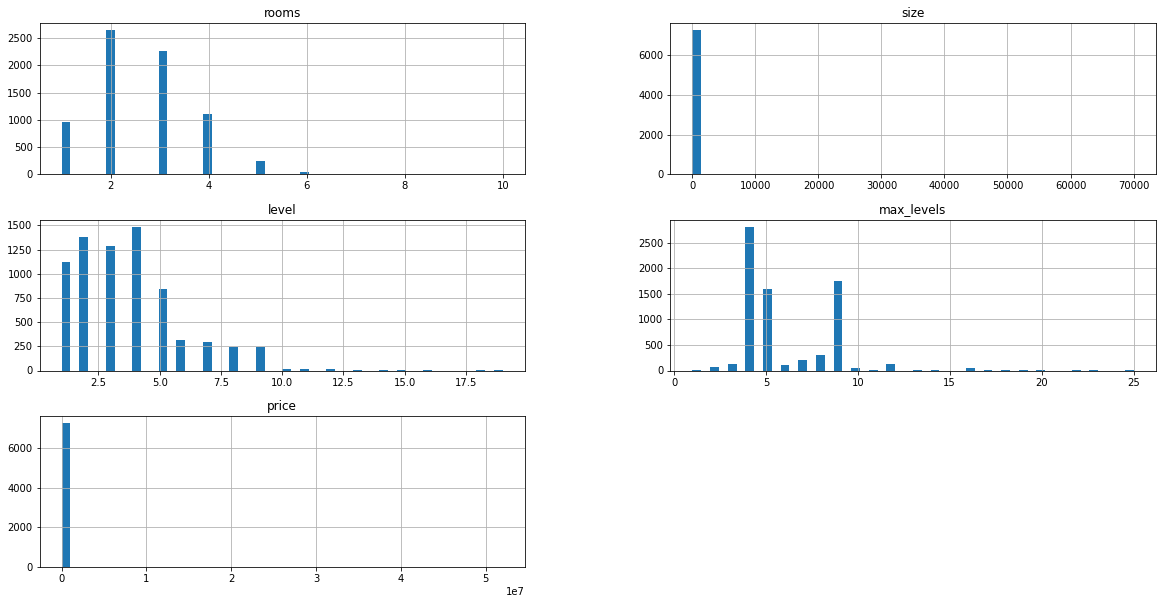

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20,10))
plt.show()

Grafikdan 'size' va 'price' ustunlarida noodatiy qiymatlar borligi ko'rinib turibdi, shularni tozalaymiz.

In [ ]:
df=df[df['size']>=30] #Aniqlanishicha eng kichik yashash meyori 30 kv.m dan kichik bo'lmasligi kerak. Link: (https://www.ustabor.uz/uz/blog/view/621/#:~:text=Bitta%20odam%20uchun%20uy%20maydonining%20me%E2%80%99yori%2030%20kv.m%20ga%20teng.%20Agar%20yaqin%20kelajakda%20oilaga%20qo%E2%80%98shilish%20rejalashtirilayotgan%20bo%E2%80%98lsa%2C%20loyihalashtirayotganda%20buni%20ham%20e%E2%80%99tiborga%20olish%20kerak.)
df=df[df['price']>=15000] #Aniqlanishicha Toshkent shahrida 15000$ dan kichiknarxda uylar yo'q.
df=df[df['price']<=800000]
df=df[df['size']<500]

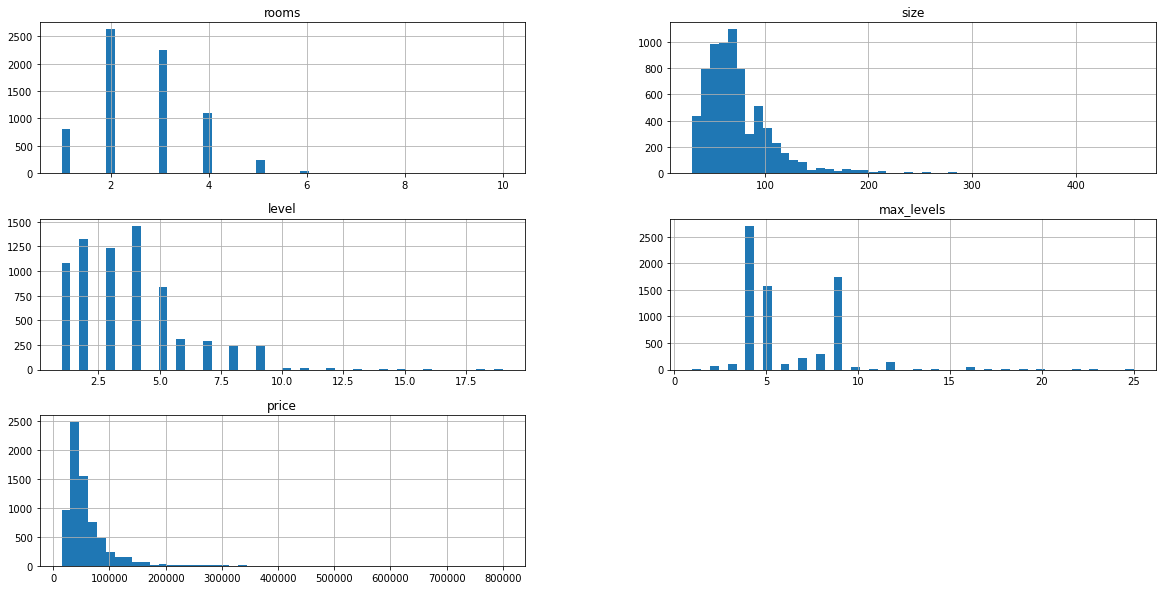

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20,10))
plt.show()

# Uy narxlarining tumanlar bo'yicha tasnifi

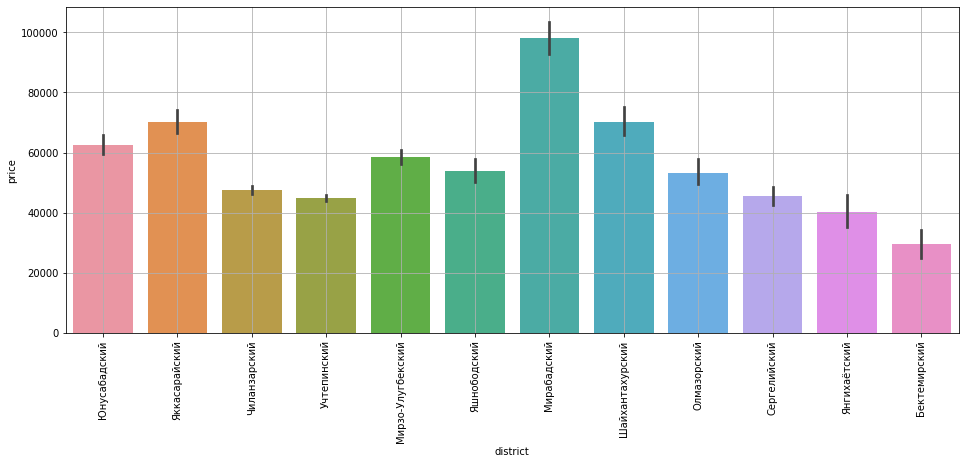

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['district'], y=df['price'])
plt.grid() # Chizmaga gorizontal va vertikal chiziqlar (setka) qo'shish
plt.xticks(rotation=90)
plt.show()

# Uylarning tumanlar bo'yicha taqsimoti

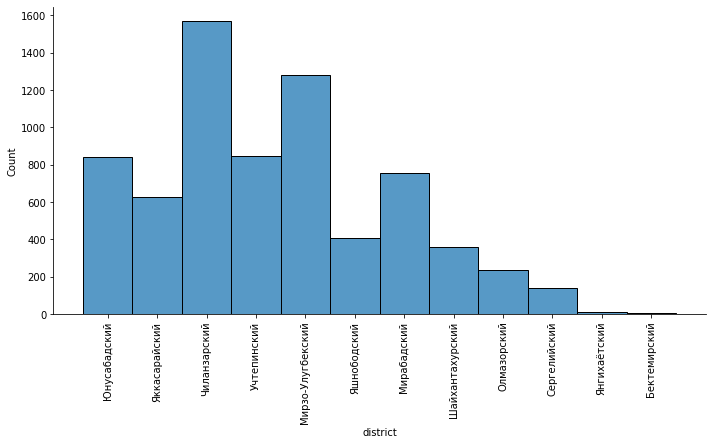

In [ ]:
sns.displot(data=df, x='district', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

Ko'rinib turibdiki tumanlarda uylar haqidagi ma'lumotlar soni bo'yicha katta tafovut bor. Bu taqsimot natija modelimiz aniqliligiga yaxshigina ta'sir qiladi.

# Uylarning xonalar soni bo'yicha taqsimoti

In [ ]:
for i in df['rooms'].unique():
  print(f"{i} xonali - {(df[df['rooms'] == i].shape[0]/df['rooms'].size)*100} %")

3 xonali - 31.694915254237287 %
2 xonali - 37.13276836158192 %
1 xonali - 11.32768361581921 %
4 xonali - 15.451977401129943 %
5 xonali - 3.516949152542373 %
8 xonali - 0.05649717514124294 %
6 xonali - 0.5932203389830508 %
7 xonali - 0.1553672316384181 %
10 xonali - 0.07062146892655367 %


Ko'rinib turibdiki xonalar soni bo'yicha ma'lumotlar taqsimotidagi tafovut juda katta. Bu ham yuqoridagidek muammo keltirib chiqarishi mumkin. Ya'ni modelimizga bizdagi ma'lumotlar ichida kam ma'lumot bo'lgan xonali uylarning narxini aniqlash so'ralsa, yaxshi natija ko'rsatmasligi mumkin.

In [ ]:
df.corr()

,rooms,size,level,max_levels,price
rooms,1.000000,0.781233,0.137674,0.176253,0.560004
size,0.781233,1.000000,0.156771,0.269475,0.801028
level,0.137674,0.156771,1.000000,0.585343,0.060900
max_levels,0.176253,0.269475,0.585343,1.000000,0.226552
price,0.560004,0.801028,0.060900,0.226552,1.000000


In [ ]:
df.corrwith(df['price']).sort_values(ascending=False)

price         1.000000
size          0.801028
rooms         0.560004
max_levels    0.226552
level         0.060900
dtype: float64

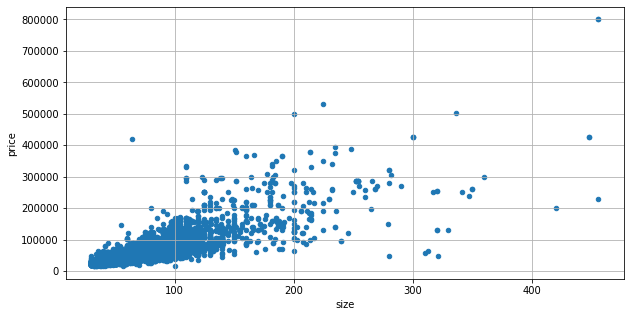

In [ ]:
df.plot(kind='scatter', x='size', y='price', figsize=(10, 5))
plt.grid()
plt.show()